In [41]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle

from matplotlib.patches import Rectangle

# Extrapolation on NK landscapes
### Visualisation of results

In [4]:
#load data 
with open('../results/extrapolation_results_NK.pkl', 'rb') as file: 
    extrap_results = pickle.load(file)

In [19]:
pearson_results = np.zeros((8, 6, 4, 6, 6)) # shape = (n_models, k_vals, replicates, train_distances, test_distances)


In [50]:
pearson_results2 = np.zeros((8, 6, 4, 6, 6))

In [51]:
extrap_results.keys()

dict_keys(['blstm', 'cnn', 'gb', 'linear', 'mlp', 'rf', 'transformer', 'ulstm'])

In [52]:
models = ['linear', 'gb', 'rf', 'mlp', 'cnn', 'ulstm', 'blstm', 'transformer']

In [53]:

for model_index, model in enumerate(models): 
    for k_index, k_value in enumerate(extrap_results[model].keys()):         
        for repl_index, replicate in enumerate(extrap_results[model][k_value].keys()): 
            for train_index, train_distance in enumerate(extrap_results[model][k_value][replicate].keys()):
                for test_index, test_distance in enumerate(list(extrap_results[model][k_value][replicate][train_distance][0].keys())[1:]):
                    pearson_results2[model_index][k_index][repl_index][train_index][test_index] = extrap_results[model][k_value][replicate][train_distance][0][test_distance]['pearson_r']
            

In [54]:
pearson_results_mean = np.mean(pearson_results, axis=2)
pearson_results_std  = np.std(pearson_results, axis=2)

pearson_results2_mean = np.mean(pearson_results2, axis=2)
pearson_results2_std  = np.std(pearson_results2, axis=2)

In [46]:
np.nanmax(pearson_results_mean)

np.float64(0.9999999999119262)

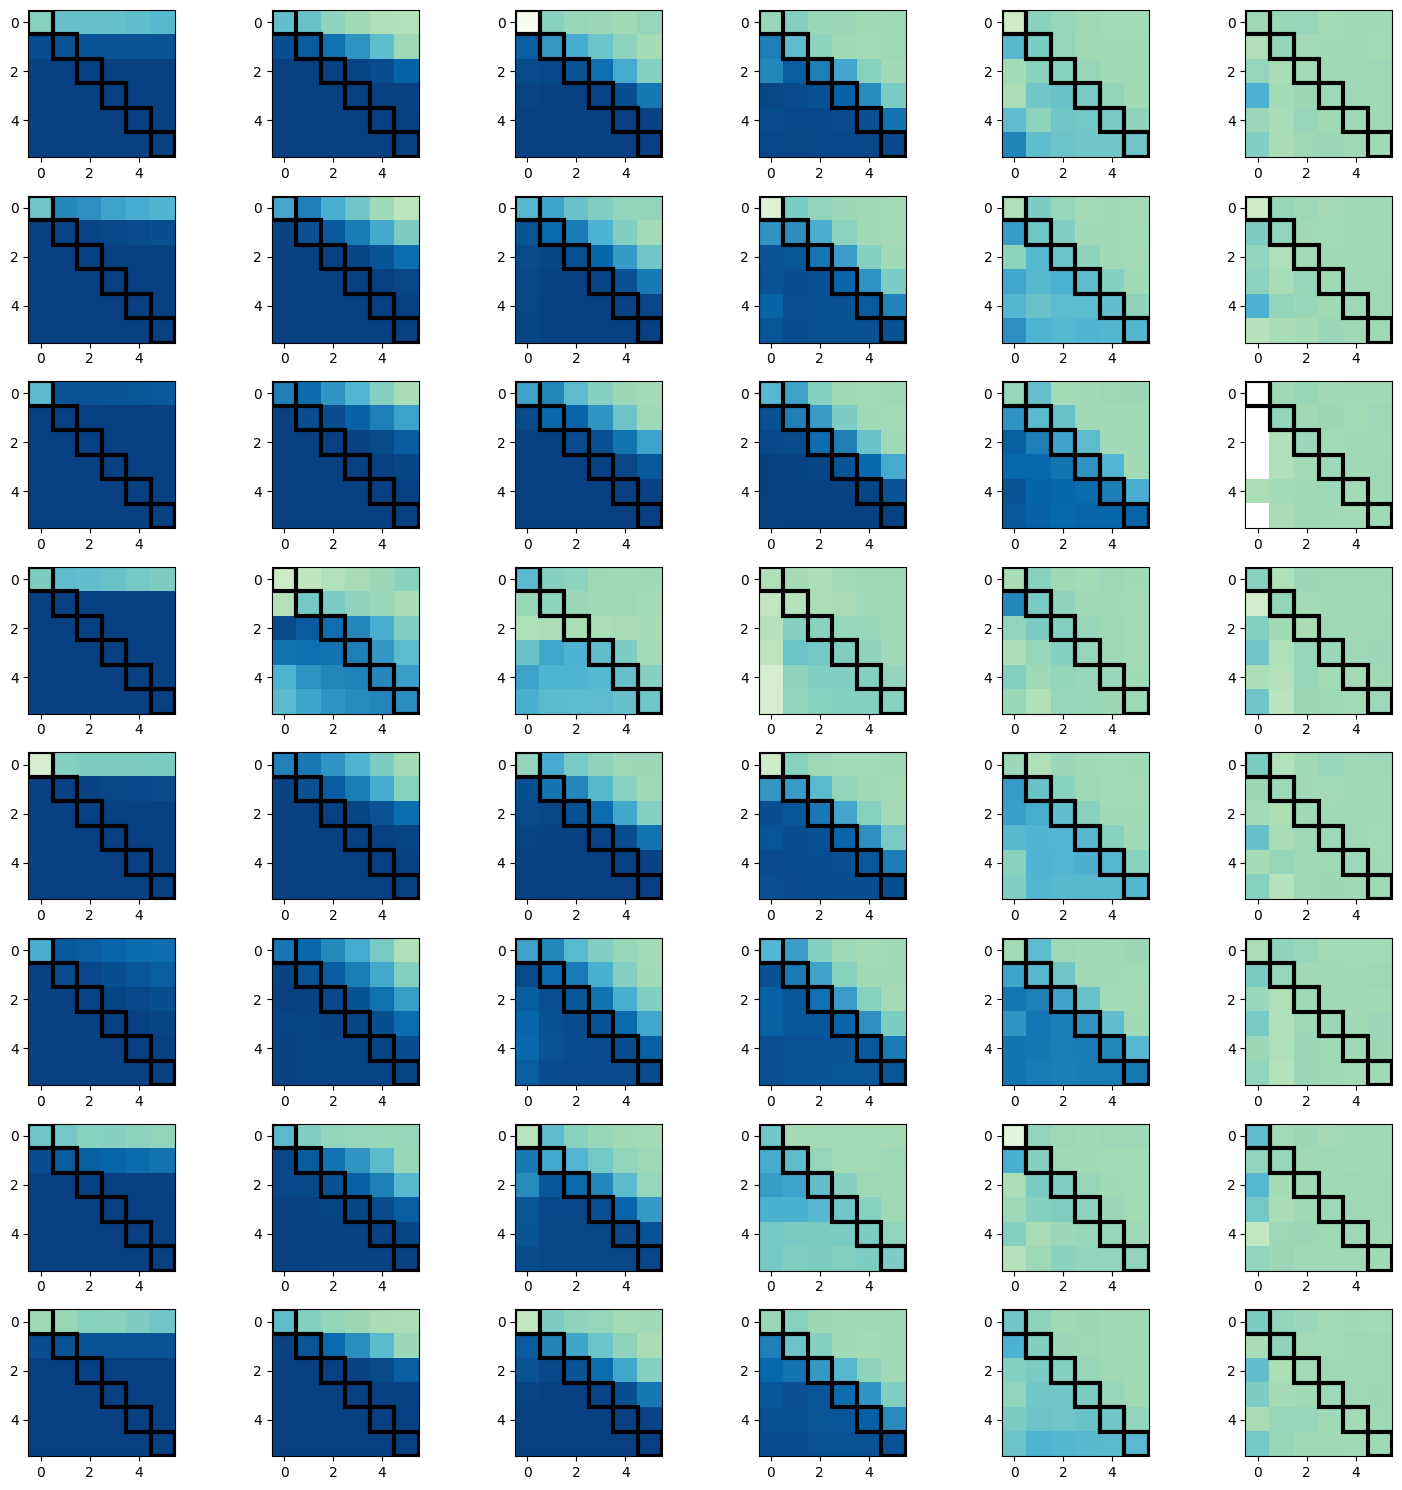

In [47]:
fig, ax = plt.subplots(nrows=8, ncols=6, figsize=(15, 15))

for i in range(pearson_results_mean.shape[0]):
    for j in range(pearson_results_mean.shape[1]): 
        data = pearson_results_mean[i][j]
        ax[i,j].imshow(data, cmap='GnBu', vmin=np.nanmin(pearson_results_mean), vmax=np.nanmax(pearson_results_mean))
        for k in range(6):   
            rect = Rectangle((k - 0.5, k - 0.5), 1, 1, 
                             edgecolor='black', facecolor='none', linewidth=3)
            ax[i,j].add_patch(rect)





fig.tight_layout()

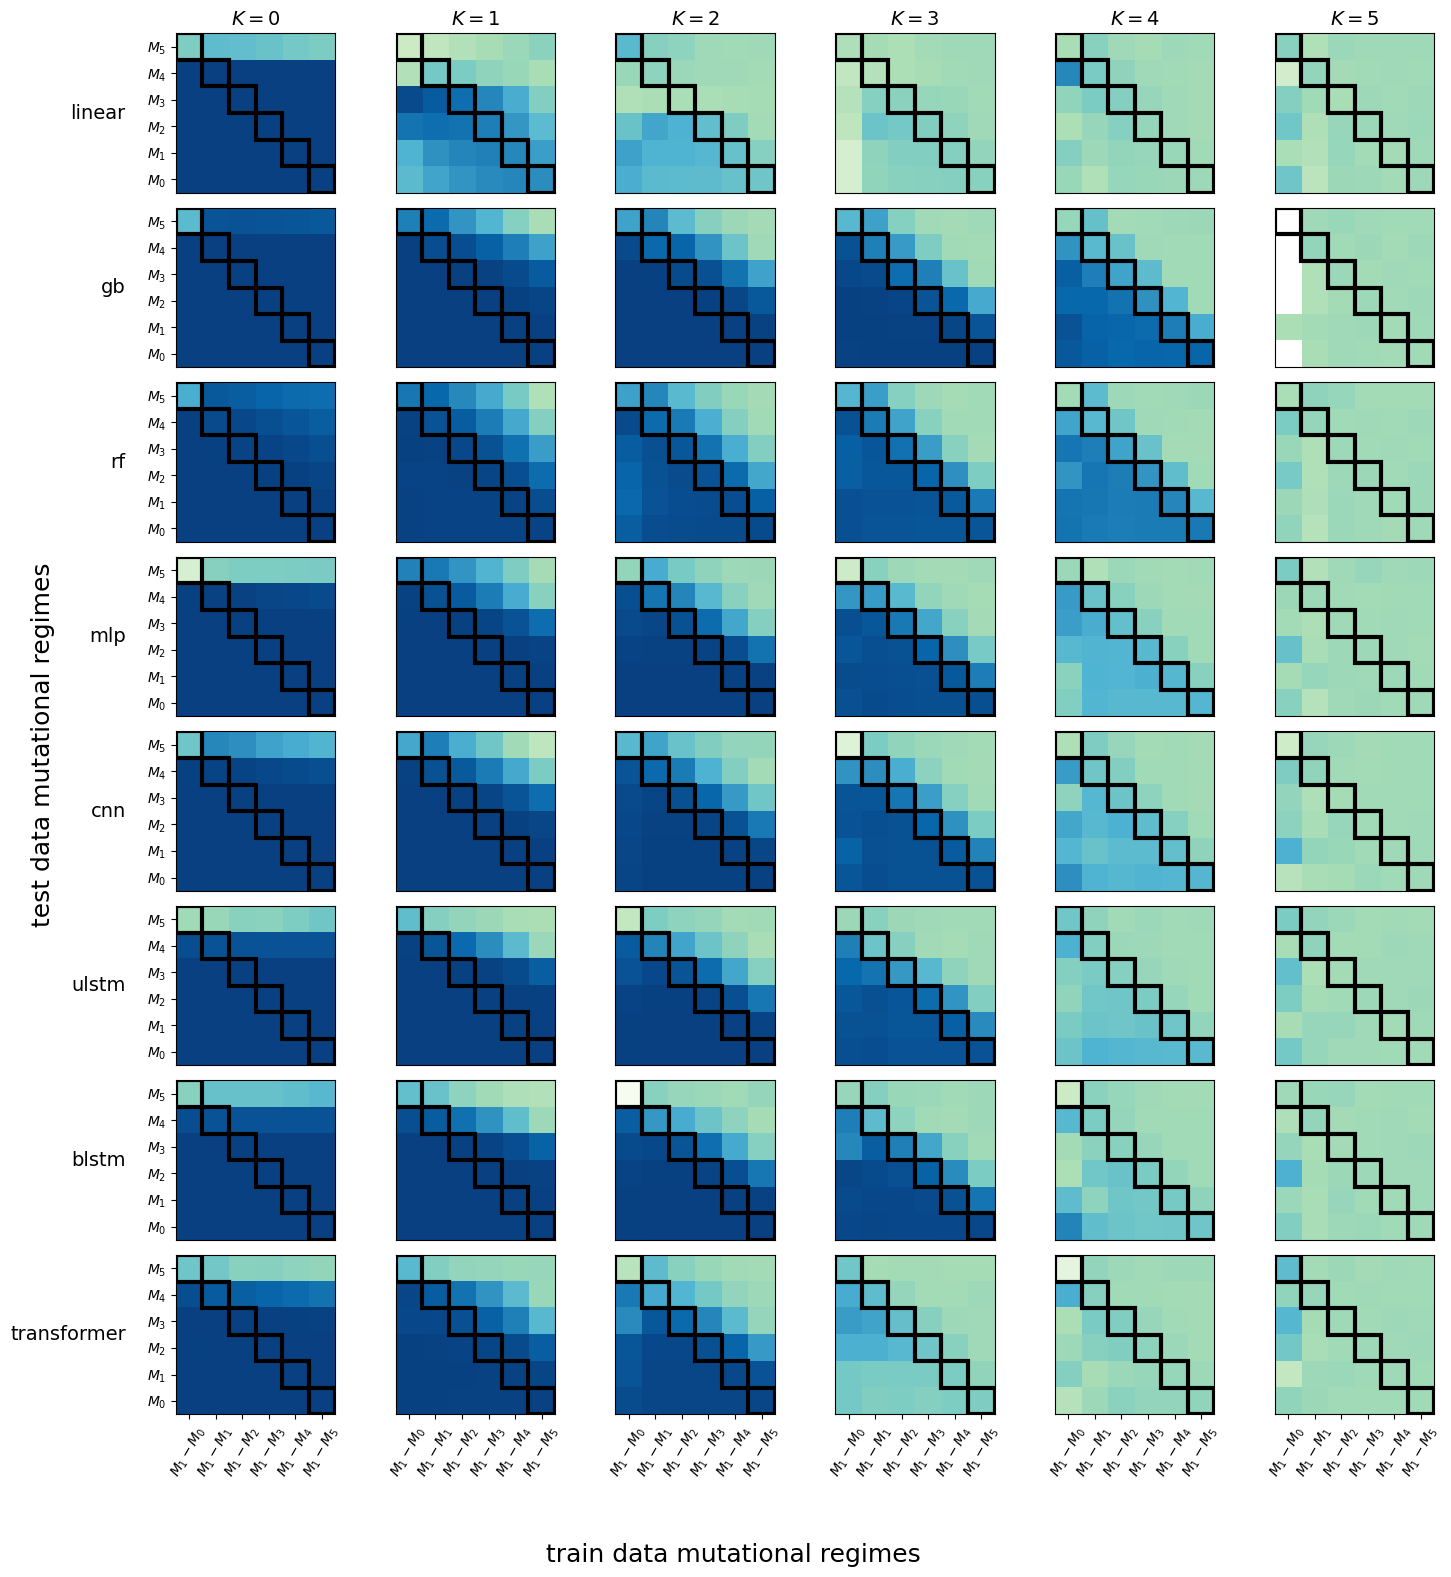

In [93]:
fig, ax = plt.subplots(nrows=8, ncols=6, figsize=(15, 15))

for i in range(pearson_results2_mean.shape[0]):
    for j in range(pearson_results2_mean.shape[1]): 
        data = pearson_results2_mean[i][j]
        ax[i,j].imshow(data, cmap='GnBu', vmin=np.nanmin(pearson_results2_mean), vmax=np.nanmax(pearson_results2_mean))
        for k in range(6):   
            rect = Rectangle((k - 0.5, k - 0.5), 1, 1, 
                             edgecolor='black', facecolor='none', linewidth=3)
            ax[i,j].add_patch(rect)

column_labels = [r'$K=0$', r'$K=1$', r'$K=2$', r'$K=3$', r'$K=4$', r'$K=5$' ]
for axis, col_label in zip(ax[0], column_labels):
    axis.set_title(col_label, fontsize=14)


row_labels = models
for axis, row_label in zip(ax[:, 0], row_labels):
    axis.set_ylabel(row_label, rotation=0, labelpad=15, fontsize=14, ha='right', va='center')
    #axis.tick_params(left=False, labelleft=False)

#do x-axis labels
x_ticks = [f'$M_1-M_{i}$' for i in range(6)]
for col_idx, axis in enumerate(ax[-1]):
    tick_labels = x_ticks
    axis.set_xticks(range(6))  # Set 6 tick positions
    axis.set_xticklabels(tick_labels, rotation=60, fontsize=10)

#do y-axis labels
y_ticks = [f'$M_{i}$' for i in range(6)]
for row_idx, axis in enumerate(ax[:,0]): 
    tick_labels = reversed(y_ticks)
    axis.set_yticks(range(6))
    axis.set_yticklabels(tick_labels, rotation=0, fontsize=10)

for ax_row in ax[:-1, 1:]:
    for axis in ax_row:
        axis.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for ind, axis in enumerate(ax[-1]): 
    if ind>0: 
        axis.tick_params(left=False, labelleft=False)

for ind, axis in enumerate(ax[:,0]): 
    if ind<7: 
        axis.tick_params(bottom=False, labelbottom=False)
    


fig.text(0.5, -0.04, 'train data mutational regimes', ha='center', va='center', fontsize=18)
fig.text(0.04, 0.5, 'test data mutational regimes', ha='center', va='center', rotation='vertical', fontsize=18)
fig.tight_layout()
plt.savefig('../figures/extrapolation_NK.svg')
plt.savefig('../figures/extrapolation_NK.png')